# seprating features using pca

Leiming Yu

* Email: ylm@ece.neu.edu
* Twitter: @yu_leiming
* Blog: http://www1.coe.neu.edu/~ylm/

Reference
* http://jotterbach.github.io/2016/03/24/Principal_Component_Analysis/

In [135]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
pca_ = PCA()

# input data
X = [[3072,1076,3505,384,3145728],
[2816,1291,3505,384,3145728],
[2560,1835,5005,256,2097152],
[512,1260,1728,384,786432],
[384,902,900,64,524288]]

# convert to numpy array
X = np.array(X)

# normalize data
X_scale = StandardScaler().fit_transform(X)

# apply dimension reduction
pca_data = pca_.fit_transform(X_scale)

/home/leiming/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/leiming/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### project feature back to the original space

### heatmap

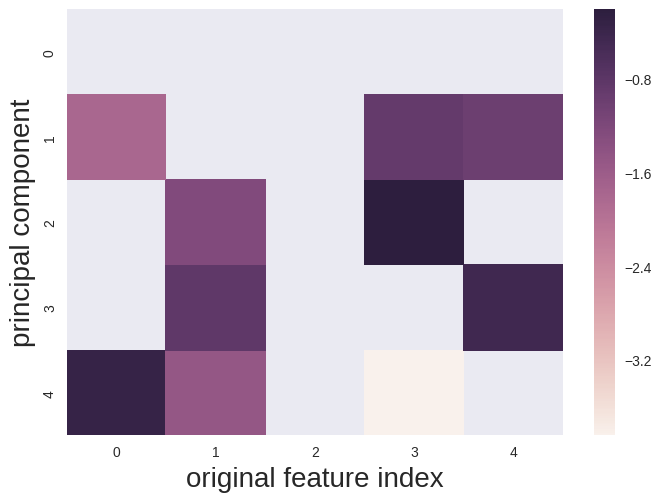

In [147]:
ax = plt.axes()

#sns.heatmap(np.log(pca_.inverse_transform(np.eye(X_scale.shape[1]))), cmap="hot", cbar=False, ax=ax)
sns.heatmap(np.log(pca_.inverse_transform(np.eye(X_scale.shape[1]))),  ax=ax)
#sns.heatmap(pca_.inverse_transform(np.eye(X_scale.shape[1])),  ax=ax)

plt.ylabel('principal component', fontsize=20);
plt.xlabel('original feature index', fontsize=20);
plt.show()

#### Thoughts

* For the first PC (PC-0), each feature are contributing to the same direction.
* For the second PC (PC-1), feature 0, 3 and 4 are contributing to the oppsite direction than the feature 1 and 2.
* To select features to analysis, it seems feature-0,3,4 are good candidates.

In [143]:
pca_.inverse_transform(np.eye(X_scale.shape[1]))

array([[-0.51244825, -0.33778953, -0.50756342, -0.35888197, -0.48670127],
       [ 0.16845642, -0.74391861, -0.3265015 ,  0.41475734,  0.37360496],
       [-0.36563044,  0.29271349, -0.13477802,  0.8250332 , -0.28598655],
       [-0.24022584,  0.4406218 , -0.56793269, -0.13427083,  0.63841035],
       [ 0.7194617 ,  0.22946588, -0.54319747,  0.02171757, -0.36631288]])

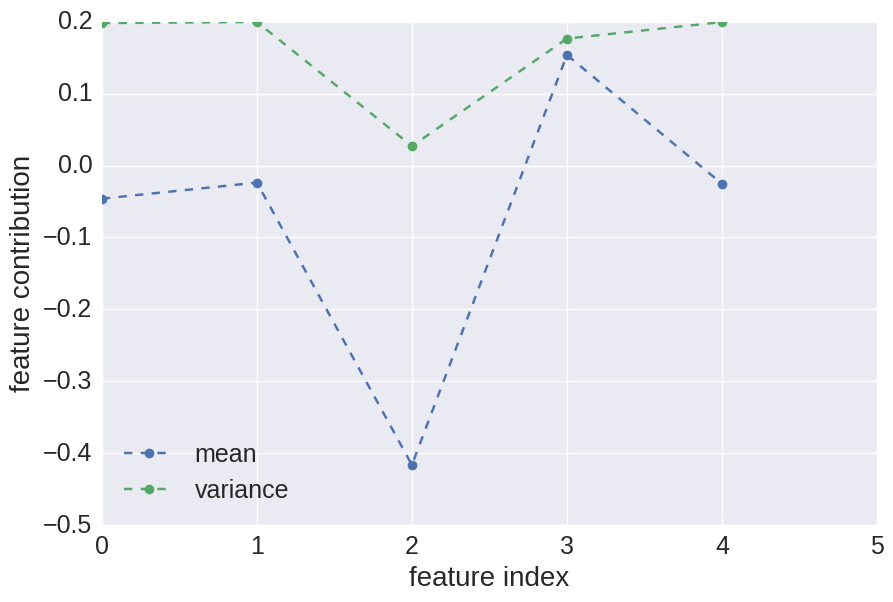

In [140]:
pca_inv_data = pca_.inverse_transform(np.eye(X_scale.shape[1]))

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 5])
plt.legend(loc='lower left', fontsize=18)

plt.show()